In [1]:
import os
import gc
from copy import deepcopy
import cv2
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

import matplotlib
import matplotlib.pyplot as plt

os.chdir('./pconv')
from libs.util import random_mask
from libs.pconv_model import PConvUnet
os.chdir('../')

# Settings
MAX_BATCH_SIZE = 128

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


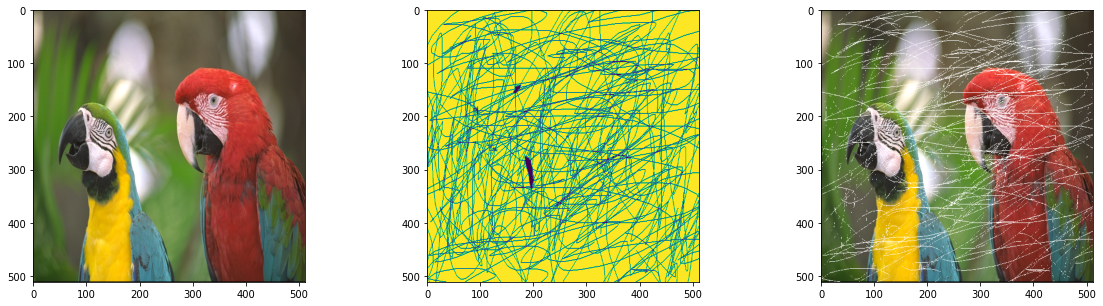

(512, 512)

In [2]:
img_path = './pconv/data/dataset/resize_512/kodim23.png'
mask_path = './pconv/data/dataset/resize_512/kodim23_mask.png'

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_cols, image_rows = img.shape[:2]
img = cv2.resize(img, (image_rows, image_cols)) / 255.
shape = img.shape

# Load mask
mask = cv2.imread(mask_path)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask = cv2.resize(mask, (image_rows, image_cols)) / 255.
mask = 1-mask

# Image + mask
masked_img = deepcopy(img)
masked_img[mask==0] = 1

# Show side by side
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(img)
axes[1].imshow(mask*255)
axes[2].imshow(masked_img)
plt.show()

image_cols, image_rows

In [3]:
weight_filepath = "./pconv/data/model/"

model = PConvUnet(img_rows=image_cols, img_cols=image_rows, weight_filepath=weight_filepath)
model.load("./pconv/data/model/1_weights_pytorch_to_keras_vgg16.h5", train_bn=False)

ValueError: You are trying to load a weight file containing 16 layers into a model with 31 layers.